<a href="https://colab.research.google.com/github/Alex112525/LangGraph-notebooks/blob/main/The_Simplest_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install langgraph langgraph-sdk langgraph-checkpoint-sqlite langsmith langchain-community langchain-core langchain-openai tavily-python wikipedia

In [2]:
import os
import random
from IPython.display import display, Image
from typing import TypedDict, Literal
from google.colab import userdata

In [3]:
from langchain_openai import AzureChatOpenAI
from langgraph.graph import StateGraph, START, END
from langchain_community.retrievers import TavilySearchAPIRetriever

### Simplest Graph

#### State

In [4]:
class State(TypedDict):
  "Schema to save the state of the graph"
  graph_state:str

#### Nodes

In [5]:
def node1(state):
  print("-- NODE 1")
  return {"graph_state": state["graph_state"] + " I am"}

def node2(state):
  print("-- NODE 2")
  return {"graph_state": state["graph_state"] + " happy"}

def node3(state):
  print("-- NODE 3")
  return {"graph_state": state["graph_state"] + " sad"}

#### Edges

In [6]:
def decide_mood(state) -> Literal["node_2", "node_3"]:
  if random.random() > 0.5:
    return "node_1"
  else:
    return "node_2"

#### Graph construction

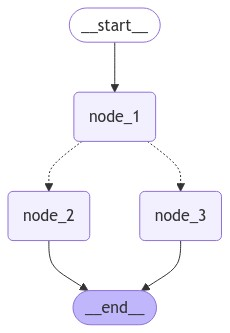

In [7]:
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node1)
builder.add_node("node_2", node2)
builder.add_node("node_3", node3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Compile
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

#### Graph Invoke

In [8]:
graph.invoke({"graph_state": "Hi, This is Alex."})

-- NODE 1
-- NODE 2


{'graph_state': 'Hi, This is Alex. I am happy'}

### Practice with nodes

In [9]:
def count(state):
  print("-- count", state)
  return {"graph_state": state["graph_state"] + 1}

In [10]:
def check_count(state) -> Literal["node_1", END]:
  if state["graph_state"] < 10:
    return "node_1"
  else:
    return END

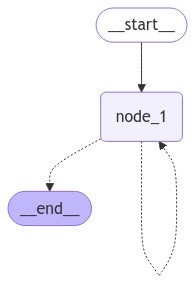

In [11]:
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", count)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", check_count)

# Compile
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({"graph_state": 0})

-- count {'graph_state': 0}
-- count {'graph_state': 1}
-- count {'graph_state': 2}
-- count {'graph_state': 3}
-- count {'graph_state': 4}
-- count {'graph_state': 5}
-- count {'graph_state': 6}
-- count {'graph_state': 7}
-- count {'graph_state': 8}
-- count {'graph_state': 9}


{'graph_state': 10}

### Practice conditionals

In [13]:
def set_random_number(state):
  print("-- count")
  return {"graph_state": random.randint(0,100)}

def div_by_two(state):
  print("-- div", state["graph_state"])
  return {"graph_state": state["graph_state"] / 2}

def plus_one(state):
  print("-- plus", state["graph_state"])
  return {"graph_state": state["graph_state"] + 1}

In [14]:
def check_num(state) -> Literal["div", "plus", END]:
  if state["graph_state"] == 1:
    return END
  if state["graph_state"]%2 == 0:
    return "div"
  else:
    return "plus"

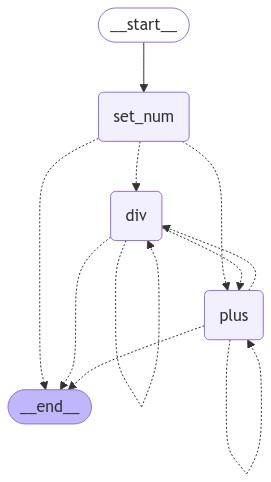

In [15]:
# Build graph
builder = StateGraph(State)
builder.add_node("set_num", set_random_number)
builder.add_node("div", div_by_two)
builder.add_node("plus", plus_one)

# Logic
builder.add_edge(START, "set_num")
builder.add_conditional_edges("set_num", check_num)
builder.add_conditional_edges("div", check_num)
builder.add_conditional_edges("plus", check_num)

# Compile
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"graph_state": 0})

-- count
-- div 90
-- plus 45.0
-- div 46.0
-- plus 23.0
-- div 24.0
-- div 12.0
-- div 6.0
-- plus 3.0
-- div 4.0
-- div 2.0


{'graph_state': 1.0}